In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
#from lightgbm import LGBMClassifier
print('Library Loaded')

Library Loaded


In [15]:
data = './heart.csv'

In [16]:
df = pd.read_csv(data)
df.shape

(303, 14)

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
cols = df.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
print("# rows in dataset {0}".format(len(df)))
print("-------------------------------------------")



for col in cols:
    print("# rows in {1} with ZERO value: {0}".format(len(df.loc[df[col] == 0 ]),col))

# rows in dataset 303
-------------------------------------------
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [23]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Visualization

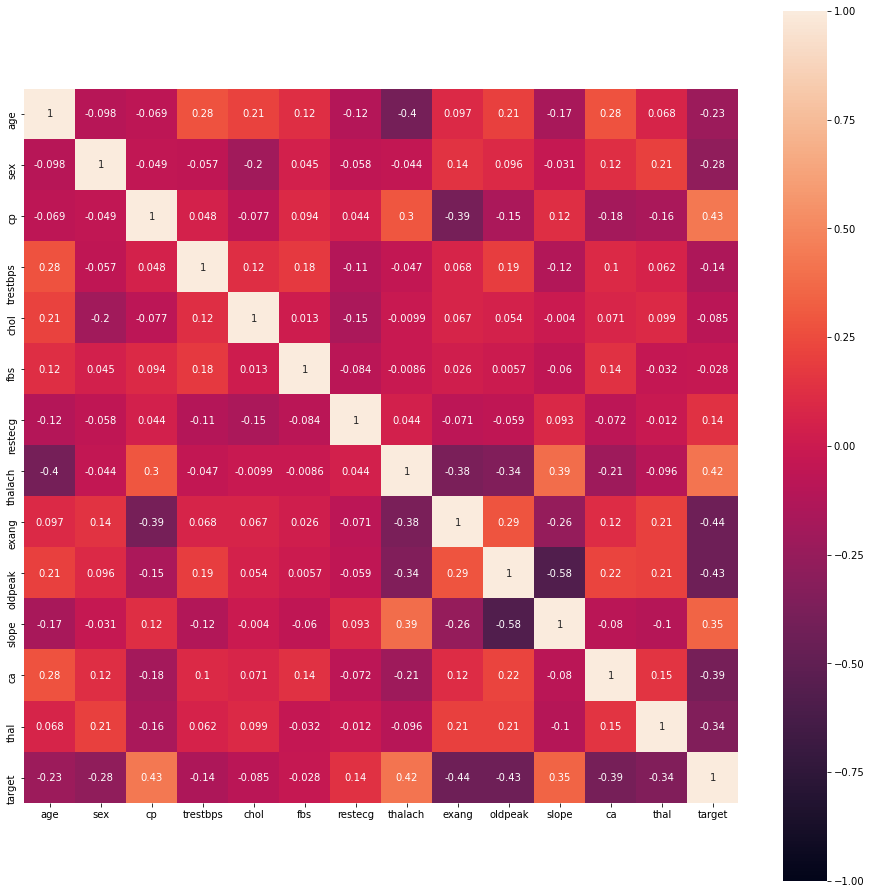

In [24]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (16, 16))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

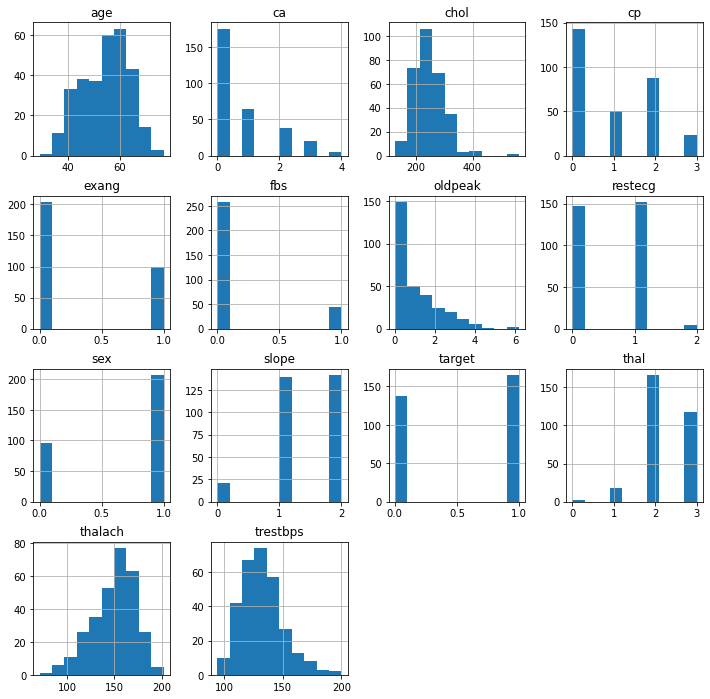

In [25]:
df.hist(figsize=(12,12))
plt.show()

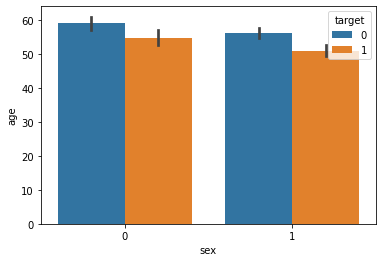

In [26]:
sns.barplot(x="sex", y="age", hue="target", data=df)


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


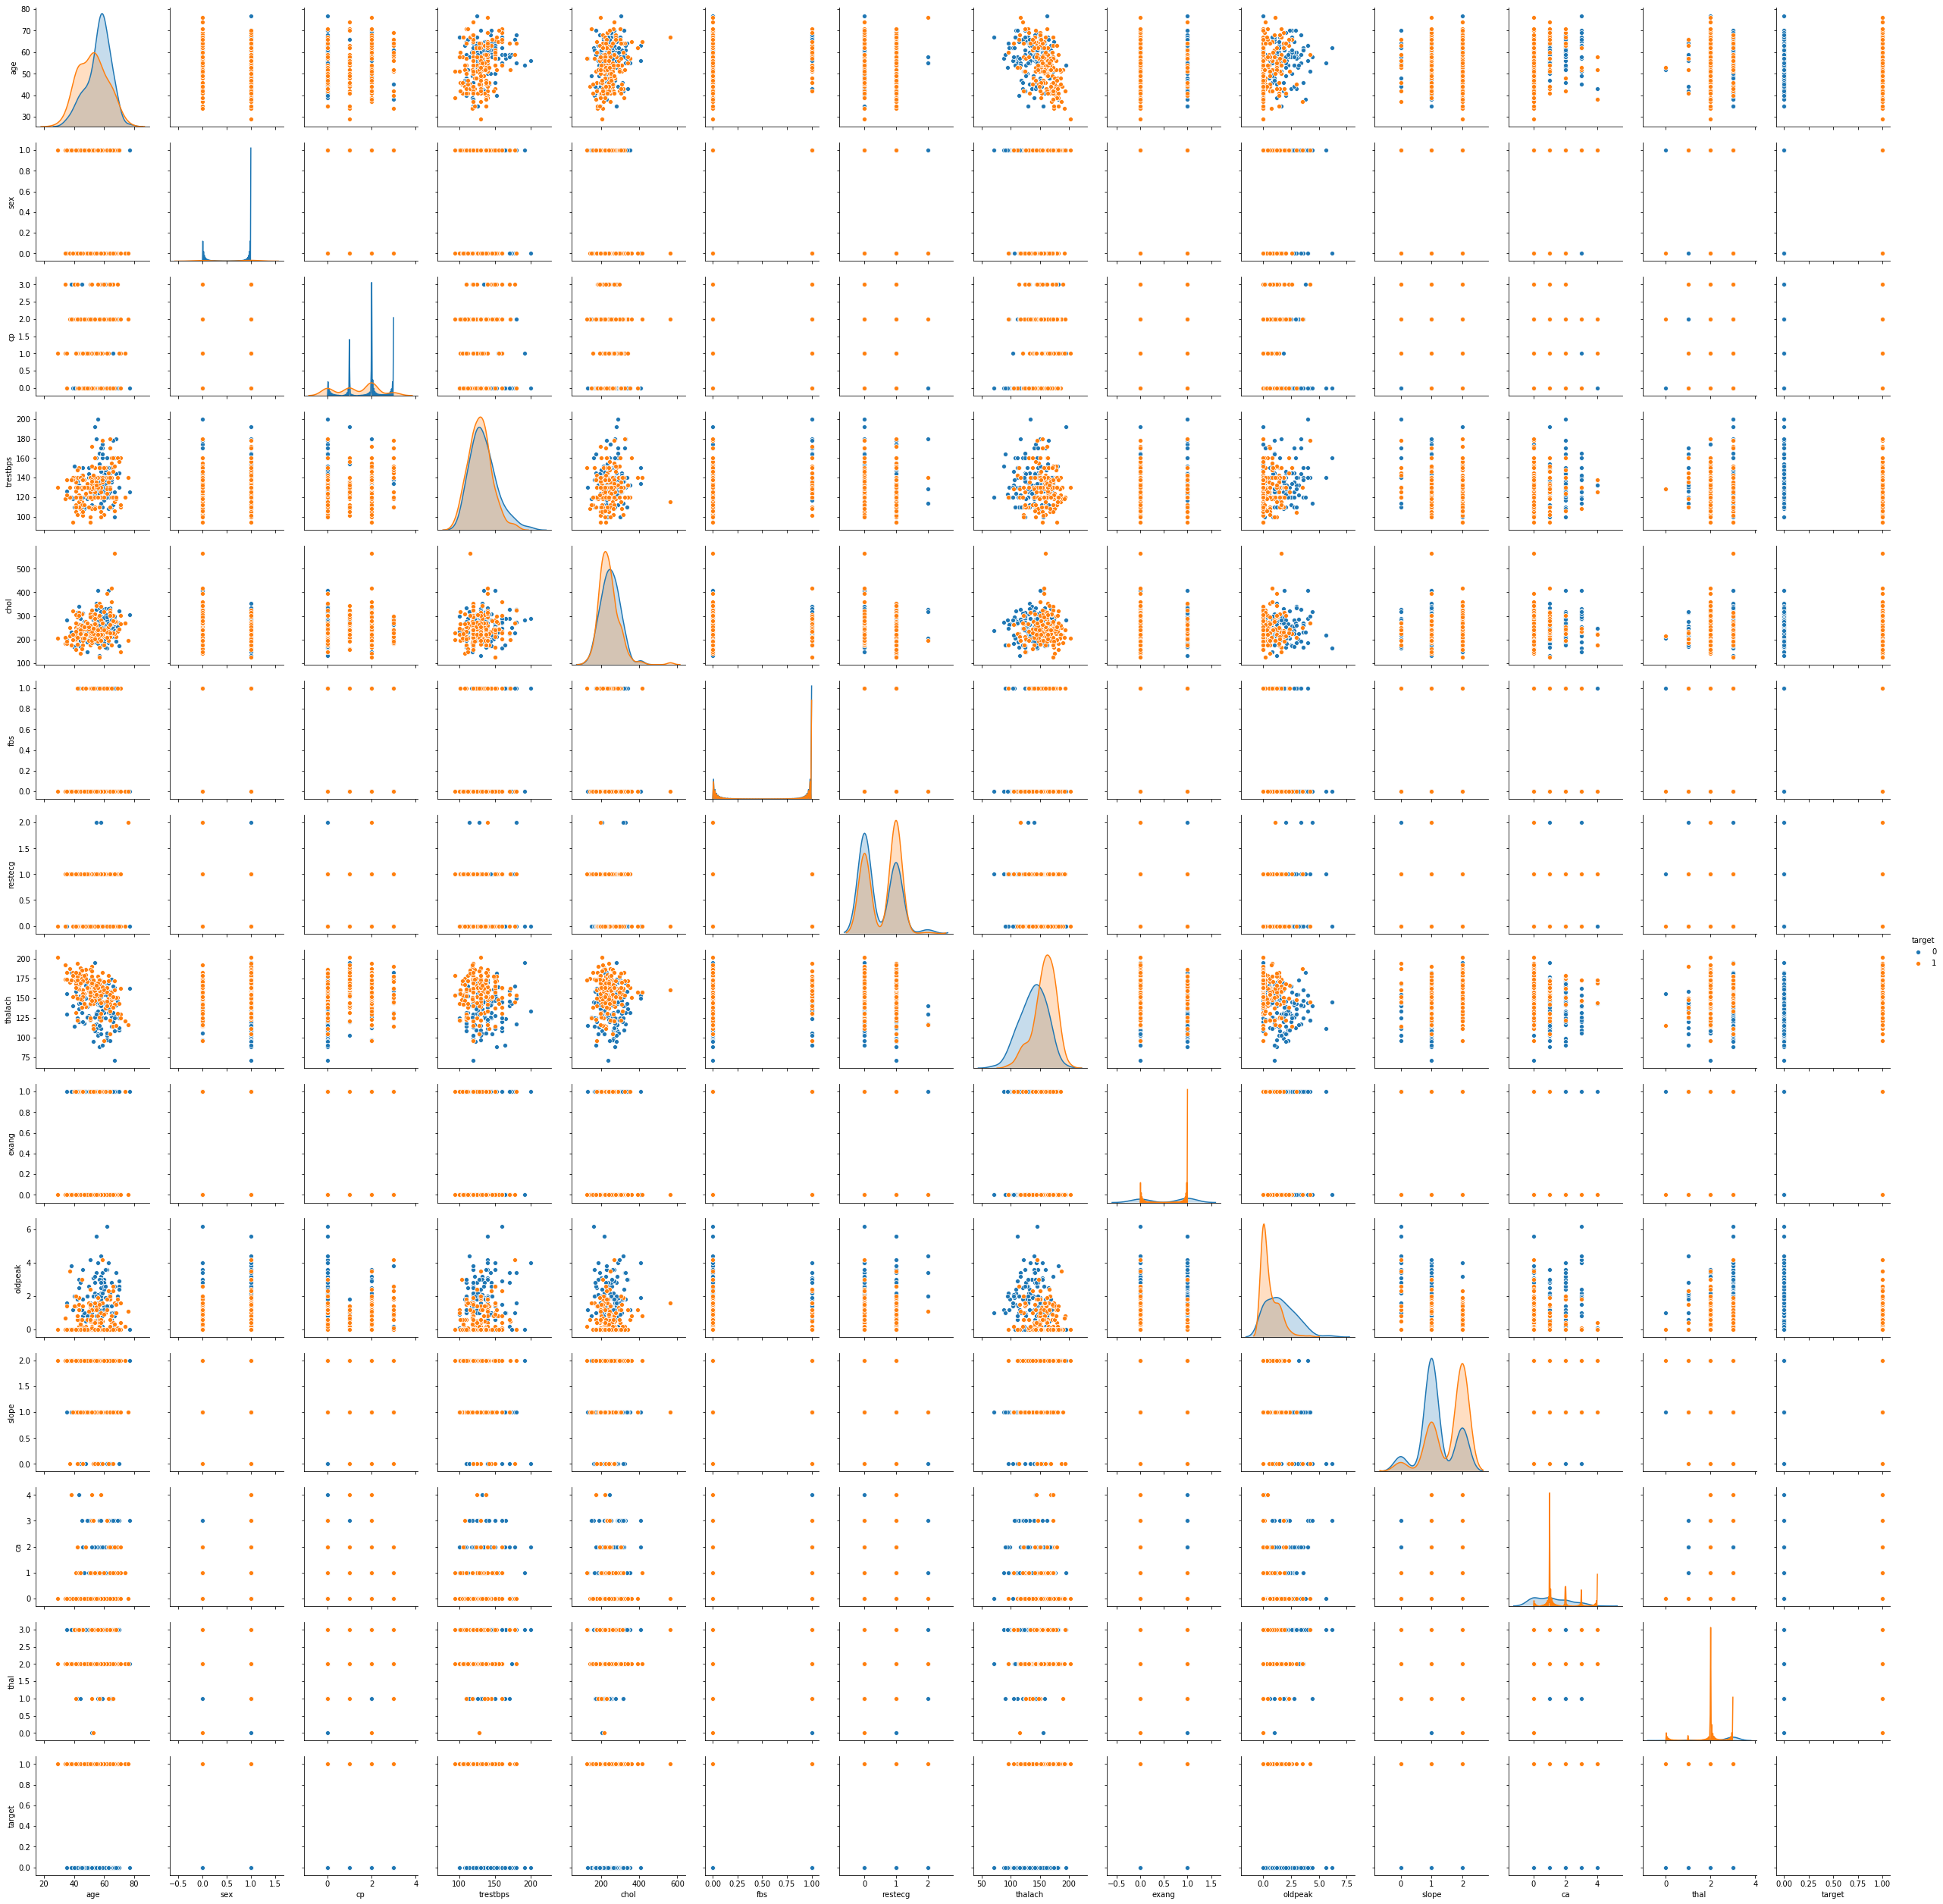

In [12]:
sns.pairplot(df,hue='target',)

In [13]:
X=df.drop('target',axis=1)
from sklearn.manifold import TSNE
import time
time_start = time.time()

df_tsne = TSNE(random_state=10).fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.080134630203247 seconds


In [14]:
df_tsne

array([[  3.4762487 ,  -1.3603013 ],
       [ -3.3546622 ,   6.8317127 ],
       [  7.4630876 ,  11.806655  ],
       [ -0.20573537,   6.0893106 ],
       [-13.153246  , -18.506779  ],
       [ 14.682378  ,   9.697134  ],
       [ -6.1308184 , -13.543728  ],
       [ -5.0965137 ,   4.5509853 ],
       [ 10.410717  ,  13.228475  ],
       [ 15.15508   ,  13.778112  ],
       [  1.4083612 ,   0.73465586],
       [ -6.869475  ,  -5.088353  ],
       [ -3.8122585 ,  -6.0805078 ],
       [ 11.391072  ,   3.4699125 ],
       [ -5.147297  , -11.5632305 ],
       [  6.8530307 ,   7.857539  ],
       [-12.507916  , -17.04128   ],
       [ 13.9756775 ,  -1.2124484 ],
       [ -1.7260321 ,   7.903262  ],
       [  3.7935266 ,  -1.8152381 ],
       [  2.6856368 ,   1.0219555 ],
       [  0.6651989 ,   8.203306  ],
       [  0.43726018,   9.281615  ],
       [  5.401388  ,  -3.5738418 ],
       [ 11.767534  ,  14.369476  ],
       [ -4.4675083 , -13.098945  ],
       [ 10.146012  ,  11.628817  ],
 

In [15]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("deep", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(-2.1914992, -2.3764958, '0'), Text(2.8864121, 3.8734412, '1')])

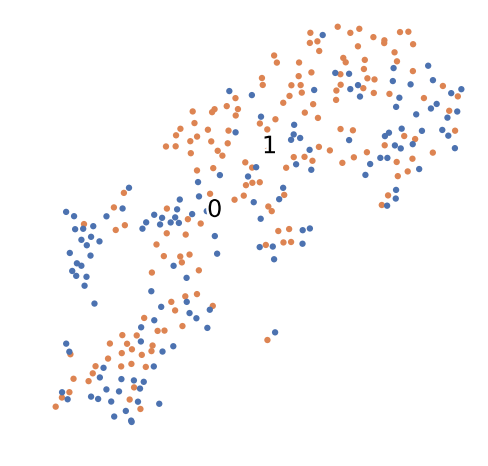

In [16]:
fashion_scatter(df_tsne, df.target)

# Feature Engineering

In [17]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [18]:
print("# rows in dataset {0}".format(len(df)))
print("-------------------------------------------")



for col in cols:
    print("# rows in {1} with ZERO value: {0}".format(len(df.loc[df[col] == 0 ]),col))

# rows in dataset 303
-------------------------------------------
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 96
# rows in cp with ZERO value: 143
# rows in trestbps with ZERO value: 0
# rows in chol with ZERO value: 0
# rows in fbs with ZERO value: 258
# rows in restecg with ZERO value: 147
# rows in thalach with ZERO value: 0
# rows in exang with ZERO value: 204
# rows in oldpeak with ZERO value: 99
# rows in slope with ZERO value: 21
# rows in ca with ZERO value: 175
# rows in thal with ZERO value: 2
# rows in target with ZERO value: 138


In [19]:
X = df.drop('target',axis=1) # predictor feature coloumns
y = df.target


X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 272
Test Set : 31
Training labels : 272
Test Labels : 31


In [20]:
from sklearn.preprocessing import Imputer
#impute with mean all 0 readings

fill = Imputer(missing_values = 0 , strategy ="mean", axis=0)

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Model Building and Evaluation

In [21]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
   
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

# Logistic Regression

In [22]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'C': 1.0, 'penalty': 'l1'}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# XGBoost

In [23]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\

[0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.92      0.85      0.88        13

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[17  1]
 [ 2 11]]


# Random Forest

In [24]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
    'max_depth' :[2,3,4,5,6,7],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.9s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'max_depth': 4, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


# SVC

In [25]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'C': 1000, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.75      0.92      0.83        13

    accuracy                           0.84        31
   macro avg       0.84      0.85      0.84        31
weighted avg       0.86      0.84      0.84        31

Accuracy Score : 0.8387096774193549
Confusion Matrix : 
 [[14  4]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Correcting the Mistake

In [ ]:
print("# rows in dataset {0}".format(len(df)))
print("-------------------------------------------")




for col in cols:
    print("# rows in {1} with ZERO value: {0}".format(len(df.loc[df[col] == 0 ]),col))

In [30]:
final_cols=cols
final_cols=list(final_cols)
final_cols.remove('sex')
final_cols.remove('target')
final_cols.remove('age')
final_cols

['cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [32]:
X = df.drop('target',axis=1) # predictor feature coloumns
y = df.target


X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.10, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 272
Test Set : 31
Training labels : 272
Test Labels : 31


In [33]:
from sklearn.preprocessing import Imputer
#impute with mean all 0 readings

fill = Imputer(missing_values = 0 , strategy ="mean", axis=0)

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [34]:
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 272
Test Set : 31
Training labels : 272
Test Labels : 31


# Refitting the model 

# Random Forest

In [36]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
    'max_depth' :[2,3,4,5,6,7],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.4s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'max_depth': 4, 'n_estimators': 1500}
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.92      0.85      0.88        13

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[17  1]
 [ 2 11]]


# SVC

In [39]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1]
Best Params : {'C': 100, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.56      0.69        18
           1       0.60      0.92      0.73        13

    accuracy                           0.71        31
   macro avg       0.75      0.74      0.71        31
weighted avg       0.78      0.71      0.71        31

Accuracy Score : 0.7096774193548387
Confusion Matrix : 
 [[10  8]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Logistic Regression

In [40]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'C': 1.0, 'penalty': 'l1'}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419
Confusion Matrix : 
 [[17  1]
 [ 1 12]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# XGBoost

In [41]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\user\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:70

[0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.92      0.85      0.88        13

    accuracy                           0.90        31
   macro avg       0.91      0.90      0.90        31
weighted avg       0.90      0.90      0.90        31

Accuracy Score : 0.9032258064516129
Confusion Matrix : 
 [[17  1]
 [ 2 11]]


# Balancing the dataset

In [46]:
X = df.drop('target',axis=1) # predictor feature coloumns
y = df.target
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,y)
pd.Series(Y_res_OS).value_counts()

Using TensorFlow backend.


1    165
0    165
dtype: int64

In [58]:
print(cols)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [59]:
X_res_OS=pd.DataFrame(X_res_OS,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal'])
Y_res_OS=pd.DataFrame(Y_res_OS,columns=['target'])

In [61]:

X_train , X_test , y_train , y_test = train_test_split(X_res_OS,Y_res_OS, test_size = 0.10, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 297
Test Set : 33
Training labels : 297
Test Labels : 33


In [64]:
print(final_cols)
type(X_train)

['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


numpy.ndarray

In [63]:
from sklearn.preprocessing import Imputer
#impute with mean all 0 readings

fill = Imputer(missing_values = 0 , strategy ="mean", axis=0)

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])


print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 297
Test Set : 33
Training labels : 297
Test Labels : 33


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


# Refitting the model 

# Random Forest

In [65]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
    'max_depth' :[2,3,4,5,6,7],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.2s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1]
Best Params : {'max_depth': 2, 'n_estimators': 1000}
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.95      0.90      0.92        20

    accuracy                           0.91        33
   macro avg       0.90      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

Accuracy Score : 0.9090909090909091
Confusion Matrix : 
 [[12  1]
 [ 2 18]]


# SVC

In [66]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1]
Best Params : {'C': 1000, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.71      0.92      0.80        13
           1       0.94      0.75      0.83        20

    accuracy                           0.82        33
   macro avg       0.82      0.84      0.82        33
weighted avg       0.85      0.82      0.82        33

Accuracy Score : 0.8181818181818182
Confusion Matrix : 
 [[12  1]
 [ 5 15]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
